In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


In [3]:
df_train = pd.read_csv('train_users_2.csv')
# df_test = pd.read_csv('test_users.csv')
# df_country = pd.read_csv('countries.csv')
df_age = pd.read_csv('age_gender_bkts.csv')
df_sessions = pd.read_csv('sessions.csv')

In [4]:
# Data preprocessing
df_train = df_train.drop(columns=['id', 'date_account_created', 'date_first_booking'])
df_train['first_affiliate_tracked'] = df_train['first_affiliate_tracked'].fillna('Unknown')
df_train[(df_train['age'] < 14) & (df_train['age'] > 110)]=np.nan
df_train['age'].fillna(df_train['age'].mean(), inplace=True)


In [5]:
# Identify categorical columns
categorical_cols = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
                    'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

# Set type to category for easier encoding later
for categorical_feature in categorical_cols:
    df_train[categorical_feature] = df_train[categorical_feature].astype('category')

In [6]:
le = LabelEncoder()

df_train['gender']= le.fit_transform(df_train['gender'])
df_train['signup_method']= le.fit_transform(df_train['signup_method'])
df_train['first_affiliate_tracked']= le.fit_transform(df_train['first_affiliate_tracked'])
df_train['signup_method']= le.fit_transform(df_train['signup_method'])
df_train['language']= le.fit_transform(df_train['language'])
df_train['affiliate_channel']= le.fit_transform(df_train['affiliate_channel'])
df_train['affiliate_provider']= le.fit_transform(df_train['affiliate_provider'])
df_train['signup_app']= le.fit_transform(df_train['signup_app'])
df_train['first_device_type']= le.fit_transform(df_train['first_device_type'])
df_train['first_browser']= le.fit_transform(df_train['first_browser'])
df_train['signup_flow']= le.fit_transform(df_train['signup_flow'])

In [9]:
# Manual Encoding for the Target column
df_train.country_destination.replace('NDF',0,inplace=True)
df_train.country_destination.replace('US',1,inplace=True)
df_train.country_destination.replace('other',2,inplace=True)
df_train.country_destination.replace('FR',3,inplace=True)
df_train.country_destination.replace('CA',4,inplace=True)
df_train.country_destination.replace('GB',5,inplace=True)
df_train.country_destination.replace('ES',6,inplace=True)
df_train.country_destination.replace('IT',7,inplace=True)
df_train.country_destination.replace('PT',8,inplace=True)
df_train.country_destination.replace('NL',9,inplace=True)
df_train.country_destination.replace('DE',10,inplace=True)
df_train.country_destination.replace('AU',11,inplace=True)
df_train['country_destination'].fillna(0, inplace=True)

In [10]:
y=df_train['country_destination']
X=df_train.drop(['country_destination'],axis=1)
from imblearn.combine import SMOTETomek
# transform the dataset
smotetomek = SMOTETomek(sampling_strategy='auto')

# split the dataset into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=1,shuffle=True,stratify=y)
X_train, y_train = smotetomek.fit_resample(X_train1, y_train1)

In [11]:
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
target_names = ['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU']
y_predrf=rf.predict(X_test1)
print(classification_report(y_test1, y_predrf, target_names=target_names))

              precision    recall  f1-score   support

         NDF       0.62      0.64      0.63      6822
          US       0.43      0.41      0.42      4589
       other       0.07      0.07      0.07       638
          FR       0.05      0.04      0.04       450
          CA       0.01      0.01      0.01       121
          GB       0.01      0.01      0.01       179
          ES       0.01      0.02      0.01       196
          IT       0.03      0.03      0.03       218
          PT       0.00      0.00      0.00        15
          NL       0.01      0.02      0.01        61
          DE       0.01      0.01      0.01       108
          AU       0.00      0.00      0.00        33

    accuracy                           0.47     13430
   macro avg       0.10      0.10      0.10     13430
weighted avg       0.47      0.47      0.47     13430



In [12]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train,y_train)


y_predxgb=xgb.predict(X_test1)

print(classification_report(y_test1, y_predxgb, target_names=target_names))

              precision    recall  f1-score   support

         NDF       0.62      0.75      0.68      6822
          US       0.48      0.41      0.44      4589
       other       0.03      0.01      0.01       638
          FR       0.08      0.03      0.04       450
          CA       0.01      0.01      0.01       121
          GB       0.01      0.01      0.01       179
          ES       0.04      0.03      0.03       196
          IT       0.04      0.02      0.03       218
          PT       0.00      0.00      0.00        15
          NL       0.00      0.00      0.00        61
          DE       0.01      0.01      0.01       108
          AU       0.01      0.03      0.02        33

    accuracy                           0.53     13430
   macro avg       0.11      0.11      0.11     13430
weighted avg       0.48      0.53      0.50     13430



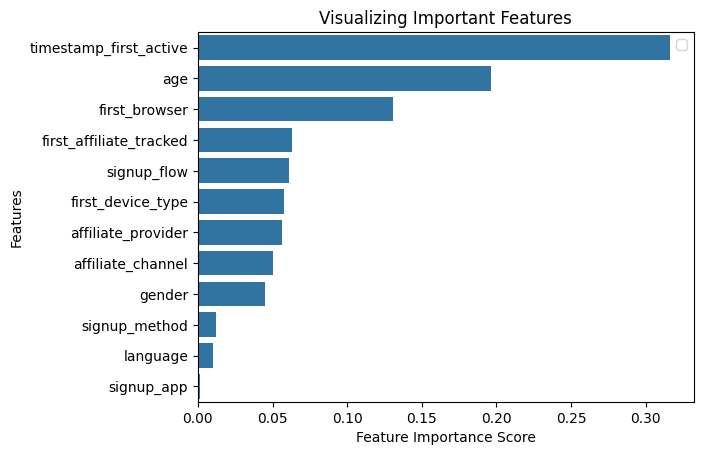

In [13]:
feature_names=list(X_train1.columns.values.tolist())
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

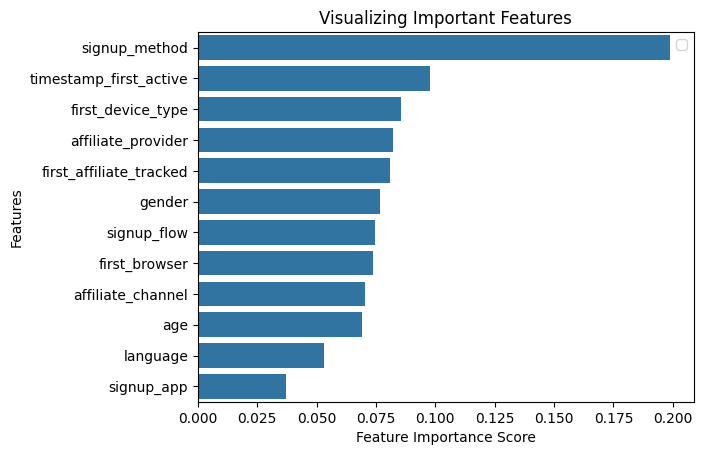

In [14]:
feature_names=list(X_train1.columns.values.tolist())
feature_imp = pd.Series(xgb.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xg', xgb)], voting='hard')

# Fit the ensemble model using the encoded target labels
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_encoded = ensemble_model.predict(X_test1)
print(classification_report(y_test1, y_pred_encoded, target_names=target_names))

              precision    recall  f1-score   support

         NDF       0.60      0.82      0.69      6822
          US       0.49      0.37      0.42      4589
       other       0.07      0.02      0.03       638
          FR       0.06      0.02      0.02       450
          CA       0.00      0.00      0.00       121
          GB       0.00      0.00      0.00       179
          ES       0.03      0.01      0.02       196
          IT       0.02      0.00      0.01       218
          PT       0.00      0.00      0.00        15
          NL       0.00      0.00      0.00        61
          DE       0.04      0.01      0.02       108
          AU       0.00      0.00      0.00        33

    accuracy                           0.54     13430
   macro avg       0.11      0.10      0.10     13430
weighted avg       0.48      0.54      0.50     13430



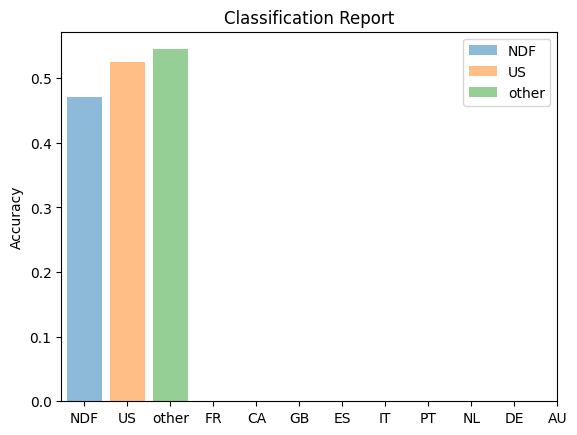

In [17]:
# Create a bar plot of the classification report
labels = target_names
y_pos = np.arange(len(labels))
performance = [accuracy_score(y_test1, y_predrf),
               accuracy_score(y_test1, y_predxgb),
               accuracy_score(y_test1, y_pred_encoded)]

# Adjust the plotting logic to handle the mismatch
fig, ax = plt.subplots()
for i, (label, perf) in enumerate(zip(labels, performance)):
    ax.bar(i, perf, label=label, align='center', alpha=0.5)

plt.xticks(np.arange(len(labels)), labels)
plt.ylabel('Accuracy')
plt.title('Classification Report')
plt.legend()
plt.show()